# <center> Homework 4 </center>
## <center> Kishore Narendran | 14644574 | narendrk@uci.edu</center>

### Problem 1 - Decision Trees
Please refer to the scanned handwritten sheet attached along with this submission.

### Problem 2 - Decision Trees on Kaggle

##### (a) Load the training data, X_train.txt and Y_train.txt. There are quite a lot of data available; for the homework you can just use the rst 10,000 samples. Split out a validation set as well, say samples 10001:20000.

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml


# Problem 2 - Decision Trees on Kaggle
# (a) - Load the training data, and split into the training and validation
#   data: first 10000 for training and the next 10000 for validation
X = np.genfromtxt("data/X_train.txt", delimiter = None)
Y = np.genfromtxt("data/Y_train.txt", delimiter = None)

Xtr, Ytr = X[:10000, :], Y[:10000]
Xval, Yval = X[10000:20000, :], Y[10000:20000]

##### (b) Learn a decision tree classier on the data. To avoid any potential recursion limits, specify a max depth of 50. Compute the training and validation error for the same

In [36]:
# (b) Learn a decision tree classifier on the data, with a maxDepth of 50
print 'Training a decision tree with depth = 50'
dt = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
trainingError = dt.err(Xtr, Ytr)
validationError = dt.err(Xval, Yval)
print 'Training Error:', trainingError
print 'Validation Error:', validationError

Training a decision tree with depth = 50
Training Error: 0.0125
Validation Error: 0.3756


##### (c) Now, try varying the maximum depth parameter (maxDepth), which forces the tree to stop after at most that many levels. Test values between 0 and 15 and compare their performance (both training and test) against the full depth. Is complexity increasing or decreasing with the depth cutoff? Identify whether you think the model begins overtting, and if so, when. If you use this parameter for complexity control, what depth would you select as best?

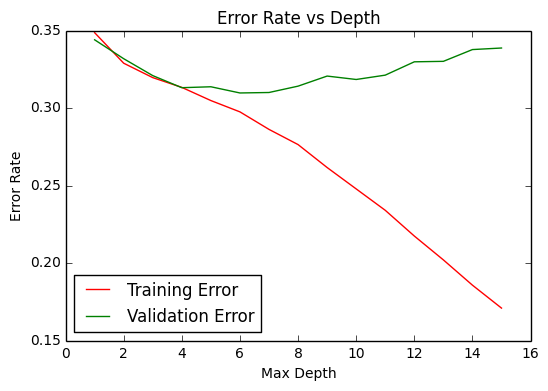

Minimum Error on Varying Depth =  0.3097
Depth for Minimum Error =  6


In [37]:
# (c) Vary the depth of the decision tree and note the training and Validation
#   errors on the same
maxDepths = range(1,16,1)
trainingErrors = []
validationErrors = []
for depth in maxDepths:
    # print 'Training a decision tree of depth = ', depth
    dt = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=depth)
    trainingErrors.append(dt.err(Xtr, Ytr))
    validationErrors.append(dt.err(Xval, Yval))

plt.plot(maxDepths, trainingErrors, 'r', label='Training Error')
plt.plot(maxDepths, validationErrors, 'g', label='Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Depth')
plt.legend(loc='lower left')
plt.show()

index = np.argmin(validationErrors)
print "Minimum Error on Varying Depth = ", validationErrors[index]
print "Depth for Minimum Error = ", maxDepths[index]

Complexity increases with increasing the maximum depth (maxDepth) parameter. The model appears to begin overfiting when the depth increases beyond 6, as evident from the graph. Hence, to select an appropriate depth parameter picking the maxDepth with the least validation error is the best, which is for the maxDepth=6.

##### (d) Now, using high maximum depth (d = 50), use minLeaf to control complexity. Try values [4,8,16,...,4096]. Is complexity increasing or decreasing as minLeaf grows? Identify when (if) the model is starting to overt, and what value you would use for this type of complexity control.

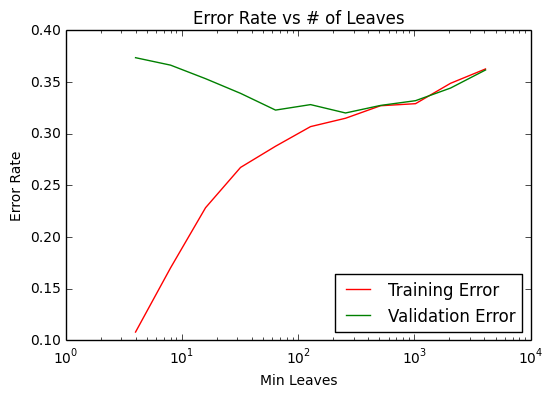

Minimum Error on Varying MinLeaves =  0.3199
MinLeaves for Minimum Error =  256


In [38]:
# (d) Vary the minimum leaves parameter decision tree and note the training
#   and Validation errors on the same
minLeaves = range(2,13,1)
minLeaves = np.power(2,minLeaves)
trainingErrors = []
validationErrors = []
for leaves in minLeaves:
    # print 'Training a decision tree with minLeaves = ', leaves
    dt = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50, minLeaf=leaves)
    trainingErrors.append(dt.err(Xtr, Ytr))
    validationErrors.append(dt.err(Xval, Yval))

plt.semilogx(minLeaves, trainingErrors, 'r', label='Training Error')
plt.semilogx(minLeaves, validationErrors, 'g', label='Validation Error')
plt.xlabel('Min Leaves')
plt.ylabel('Error Rate')
plt.title('Error Rate vs # of Leaves')
plt.legend(loc='lower right')
plt.show()

index = np.argmin(validationErrors)
print "Minimum Error on Varying MinLeaves = ", validationErrors[index]
print "MinLeaves for Minimum Error = ", minLeaves[index]

As the minLeaves parameter increases the validation error first drops and then increases, studying the above results, it is evident that beyond the minLeaves=256 parameter the model begins to overfit. 

##### (f) Our Kaggle competition measures performance using the ROC curve, specically the AUC (area under the curve) score. Compute and plot the ROC curve for your trained model (using e.g. the roc member function), and the area under the curve (auc).

Training Error: 0.2878
Validation Error: 0.3103
AUC Training Data: 0.723561887762
AUC Validation Data: 0.66958782416


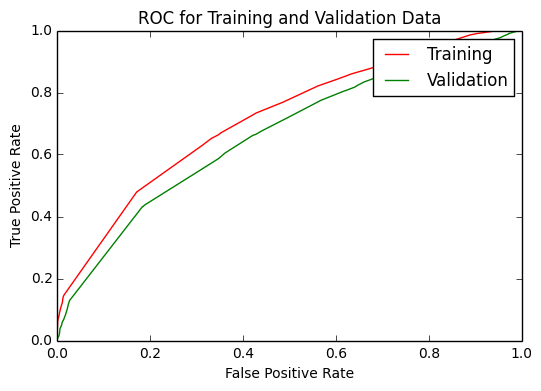

In [39]:
# (e) Compute and plot the ROC curve for the trained model and the AUC score
#   for the trained model

dt = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=7, minLeaf=4)

errTrain = dt.err(Xtr, Ytr)
errVal = dt.err(Xval, Yval)

print 'Training Error:', errTrain
print 'Validation Error:', errVal

print 'AUC Training Data:', dt.auc(Xtr, Ytr)
print 'AUC Validation Data:', dt.auc(Xval, Yval)

fprTrain, tprTrain, tnrTrain = dt.roc(Xtr, Ytr)
fprValidation, tprValidation, tnrValidation = dt.roc(Xval, Yval)

plt.plot(fprTrain, tprTrain, 'r', label='Training')
plt.plot(fprValidation, tprValidation, 'g', label='Validation')
plt.title('ROC for Training and Validation Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper right')
plt.show()

##### (f) Using your best complexity control value (either depth or number of leaf data), re-train a model (you may use the rest 10k data, or more, as you prefer). Load the test features X_test.txt, and make predictions on all 200k test points. Output your predictions in the format expected by Kaggle. Upload them and report your model's performance. Compare its performance to the AUC score you estimated using the validation data.

In [40]:
# (f) Using the best complexity model training with the first 20000 entries,
#   and predicting for all the entries in the X_test.txt data file
print "Training with 20000 entries and making predictions"
newXtr, newYtr = X[:20000, :], Y[:20000]
dt = ml.dtree.treeClassify(newXtr, newYtr, maxDepth=7, minLeaf=4)
Xte = np.genfromtxt("data/X_test.txt", delimiter = None)
Ypred = dt.predictSoft( Xte )
np.savetxt('Yhat_dtree_d7_l4.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

Training with 20000 entries and making predictions


### Problem 3 - Random Forests

##### (a) Using your validation split, learn a bagged ensemble of decision trees on the training data and evaluate validation performance.

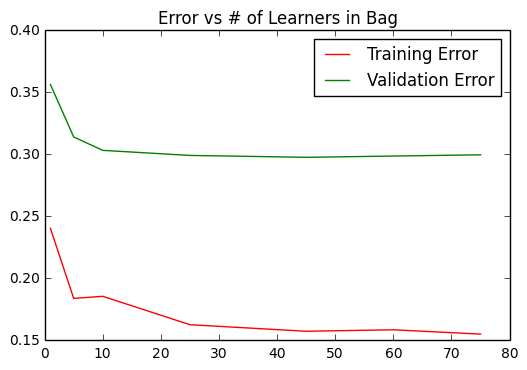

Minimum Error on an Ensemble of Learners =  0.2977
Number of Learners in Ensemble =  45


In [41]:
X = np.genfromtxt("data/X_train.txt", delimiter = None)
Y = np.genfromtxt("data/Y_train.txt", delimiter = None)

Xtr, Ytr = X[:10000, :], Y[:10000]
Xval, Yval = X[10000:20000, :], Y[10000:20000]

bags = [1,5,10,25,45,60,75]
bagTrainError = []
bagValidationError = []
ensembles = []
for bag in bags:
    decisionTrees = [None]*bag
    trainingError = []
    for i in range(0,bag,1):
        # Drawing a random training sample every single time
        Xi, Yi = ml.bootstrapData(Xtr,Ytr, n_boot=10000)
        decisionTrees[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth=16, minLeaf=4, nFeatures=6)

    YHatValidation = np.zeros((Xval.shape[0], bag))
    YHatTraining = np.zeros((Xtr.shape[0], bag))
    for i in range(0,len(decisionTrees),1):
        decisionTree = decisionTrees[i]
        YHatValidation[:, i] = decisionTree.predict(Xval)
        YHatTraining[:,i] = decisionTree.predict(Xtr)

    # YHatValidation = np.sum(YHatValidation, axis=1)/float(bag)
    YHatValidation = np.mean(YHatValidation, axis=1)
    YHatValidation[YHatValidation > 0.5] = 1
    YHatValidation[YHatValidation <= 0.5] = 0

    # YHatTraining = np.sum(YHatTraining, axis=1)/float(bag)
    YHatTraining = np.mean(YHatTraining, axis=1)
    YHatTraining[YHatTraining > 0.5] = 1
    YHatTraining[YHatTraining <= 0.5] = 0

    bagValidationError.append(np.mean(YHatValidation != Yval))
    bagTrainError.append(np.mean(YHatTraining != Ytr))

    ensembles.append(decisionTrees)

plt.plot(bags, bagTrainError, 'r', label='Training Error')
plt.plot(bags, bagValidationError, 'g', label='Validation Error')
plt.legend(loc='upper right')
plt.title('Error vs # of Learners in Bag')
plt.show()

index = np.argmin(bagValidationError)
print "Minimum Error on an Ensemble of Learners = ", bagValidationError[index]
print "Number of Learners in Ensemble = ", bags[index]

##### (b) Now choose an ensemble size and build an ensemble using at least 10k training data points, make predictions on the test data, and upload to Kaggle. Report your preformance.

In [42]:
ensemble = ensembles[index]
Xtest =  np.genfromtxt("data/X_test.txt", delimiter = None)
Ypred = np.zeros((Xtest.shape[0], 2))
for dt in ensemble:
    Ypred += dt.predictSoft(Xtest)

Ypred = Ypred/float(len(ensemble))
np.savetxt('Yhat_dtree_ensemble.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')
